In [1]:
from IPython.display import Image

# <font color="brown">01. 원-핫 인코딩(One-Hot Encoding)</font>

---

## <font color="orange">1. 원-핫 인코딩(One-hot encoding)이란?</font>

원-핫 인코딩은 선택해야 하는 선택지 개수만큼의 차원을 가지면서, 각 선택지의 인덱스에 **해당하는 원소에는 1**, **나머지 원소는 0**의 값을 가지도록 하는 표현 방법이다.

예를 들어 강아지, 고양이, 냉장고라는 3개의 선택지가 있다고 가정해보자.<br><br>

원-핫 인코딩을 하기 위해서는 우선 각 선택지에 순차적으로 정수 인덱스를 부여한다.

임의로 강아지는 0번 인덱스, 고양이는 1번 인덱스, 냉장고는 2번 인덱스를 부여하였다고 해보도록 하자.

이 때 각 선택지에 대해서 원-핫 인코딩이 된 벡터는 다음과 같다.

강아지 = [1, 0, 0]

고양이 = [0, 1, 0]

냉장고 = [0, 0, 1]

총 선택지는 3개였으므로 위 벡터들은 전부 3차원의 벡터가 되었다.

그리고 각 선택지의 벡터들을 보면 해당 선택지의 인덱스에만 1의 값을 가지고, 나머지 원소들은 0의 값을 가진다.

예를 들어, 고양이는 1번 인덱스였으므로 원-핫 인코딩으로 얻은 벡터에서 1번 인덱스만 1의 값을 가지는 것을 볼 수 있다.<br><br>

이와 같이 원-핫 인코딩으로 표현된 벡터를 **원-핫 벡터(One-hot vector)** 라고 한다.

## <font color="orange">2. 원-핫 벡터의 무작위성</font>

실제값을 원-핫 벡터로 표현해야만 다중 클래스 분류 문제를 풀 수 있는 것은 아니지만, 대부분의 다중 클래스 분류 문제가 **각 클래스 간의 관계가 균등하다는 점**에서 원-핫 벡터는 이러한 점을 표현할 수 있는 적절한 표현 방법이다.<br><br>

다수의 클래스를 분류하는 문제에서는 이진 분류처럼 2개의 숫자 레이블이 아니라 클래스의 개수만큼 숫자 레이블이 필요하다.

이때 직관적으로 생각해볼 수 있는 레이블 방법은 분류해야 할 클래스 전체에 정수 인코딩을 하는 것이다.

예를 들어, 분류해야 할 레이블이 {red, green, blue}와 같이 3개라면 각각 0, 1, 2로 레이블을 한다.

그런데 일반적인 다중 클래스 분류 문제에서 레이블 방법으로는 위와 같은 정수 인코딩이 아니라 원-핫 인코딩을 사용하는 것이 보다 클래스의 성질을 잘 표현하였다고 할 수 잇다.

**왜 그러한 것일까?**<br><br>

Banana, Tomato, Apple라는 3개의 클래스가 존재하는 문제가 있다고 가정해보도록 하자.

레이블은 정수 인코딩을 사용하여 각각 1, 2, 3을 부여하였다.

손실 함수로 선형 회귀 챕터에서 배운 평균 제곱 오차 MSE를 사용하면 정수 인코딩이 어떤 오해를 불러일으킬 수 있는지 확인할 수 있다.

아래의 식은 앞서 선형 회귀에서 배웠던 MSE를 다시 그대로 가져온 것이다. $\hat{y}$은 예측값을 의미한다.

$$Loss function = \frac{1}{n}\sum_{i}^n (y_i - \hat{y}_i)^2$$

직관적인 오차 크기 비교를 위해 평균을 구하는 수식은 제외하고 제곱 오차로만 판단해보도록 하자.

실제값이 Tomato(2)일 때, 예측값이 Banana(1)이었다면 제곱 오차는 다음과 같다.

$(2 - 1)^2 = 1$

실제값이 Apple(3)일 때, 예측갑이 Banana(1)이었다면 제곱 오차는 다음과 같다.

$(3 - 1)^2 = 4$

즉, Banana와 Tomato 사이의 오차보다 Banana와 Apple의 오차가 더 크다.

이는 기계에게 Banana가 Apple보다는 Tomato에 더 가깝다는 정보를 주는 것과 다름없다.

더 많은 클래스에 대해서 정수 인코딩을 수행했다고 해보자.

{Banana : 1, Tomato : 2, Apple : 3, Strawberry : 4, ... Watermelon : 10}

이 정수 인코딩은 Banana가 Watermelon보다는 Tomato에 더 가깝다는 의미를 담고 있다.

이는 사용자가 부여하고자 했던 정보가 아니다. 이러한 정수 인코딩의 순서 정보가 도움이 되는 분류 문제도 물론 있다.

예를 들어, {baby, child, adolescent, adult}나 {1층, 2층, 3층, 4층}이나 {10대, 20대, 30대, 40대}와 같은 경우가 이에 해당된다.

하지만 일반적인 분류 문제에서는 각 클래스는 순서의 의미를 갖고 있지 않으므로 각 클래스 간의 오차는 균등한 것이 옳다.

**정수 인코딩과 달리 원-핫 인코딩은 분류 문제 모든 클래스 간의 관계를 균등하게 분배한다.**<br><br>

아래는 세 개의 카테고리에 대해서 원-핫 인코딩을 통해서 레이블을 인코딩했을 때, 각 클래스 간의 제곱 오차가 균등함을 보여준다.

$((1, 0, 0) - (0, 1, 0))^2 = (1 - 0)^2 + (0 - 1)^2 + (0 - 0)^2 = 2$

$((1, 0, 0) - (0, 0, 1))^2 = (1 - 0)^2 + (0 - 0)^2 + (0 - 1)^2 = 2$

다르게 표현하면 모든 클래스에 대해서 원-핫 인코딩을 통해 얻은 원-핫 벡터들은 모든 쌍에 대해서 유클리드 거리를 구해도 전부 유클리드 거리가 동일하다.

원-핫 벡터는 이처럼 각 클래스의 표현 방법이 무작위성을 가진다는 점을 표현할 수 있다.

# <font color="brown">02. 소프트맥스 회귀(Softmax Regression) 이해하기</font>

---

이번 챕터에서는 소프트맥스 회귀를 통해 3개 이상의 선택지 중에서 1개를 고르는 다중 클래스 분류(Multi-Class Classification)를 실습해보도록 한다.

## <font color="orange">1. 다중 클래스 분류(Multi-class Classification)</font>

이진 분류가 두 개의 답 중 하나를 고르는 문제였다면, 세 개 이상의 답 중 하나를 고르는 문제를 다중 클래스 분류(Multi-class Classification)라고 한다.

아래의 문제는 3개의 붓꽃 품종 중 어떤 품종인지를 예측하는 문제로 전형적인 다중 클래스 분류 문제이다.

|SepalLength|SepalWidth|PetalLength|PetalWidth|Species(y)|
|-----|-----|-----|-----|-----|
|5.1|3.5|1.4|0.2|setosa|
|4.9|3.0|1.4|0.2|setosa|
|5.8|2.6|4.0|1.2|versicolor|
|6.7|3.0|5.2|2.3|virginica|
|5.6|2.8|4.9|2.0|virginica|

위 붓꽃 품종 분류하기 문제를 어떻게 풀지 고민하기 위해 앞서 배운 로지스틱 회귀의 이진 분류를 복습해보도록 하자.<br><br>

이번 챕터의 설명에서 입력은 $X$, 가중치는 $W$, 편향은 $B$, 출력은 $\hat(Y)$로 각 변수는 벡터 또는 행렬로 가정한다.

### 1) 로지스틱 회귀

로지스틱 회귀에서 시그모이드 함수는 예측값을 0과 1사이의 값으로 만든다.

예를 들어, 스팸 메일 분류기를 로지스틱 회귀로 구현하였을 때, 출력이 0.75라면 이는 이메일이 스팸일 확률이 75%라는 의미가 된다.

반대로, 스팸 메일이 아닐 확률은 25%가 된다.

이 두 확률의 총 합은 1이다.

$가설 : H(X) = sigmoid(WX + B)$

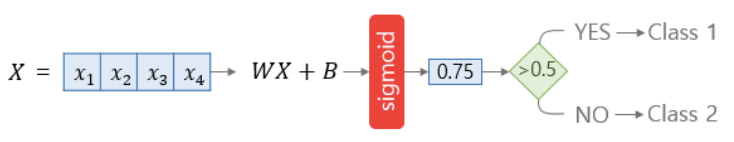

In [5]:
Image("./Images/다중클래스 분류 1.png", width = 500, height = 500)

### 2) 소프트맥스 회귀

소프트맥스 회귀는 확률의 총 합이 1이 되는 이 아이디어를 다중 클래스 분류 문제에 적용한다.

소프트맥스 회귀는 각 클래스, 즉 각 선택지마다 소수 확률을 할당한다.

이때 총 확률의 합은 1이 되어야 한다. 이렇게 되면 각 선택지가 정답일 확률로 표현된다.

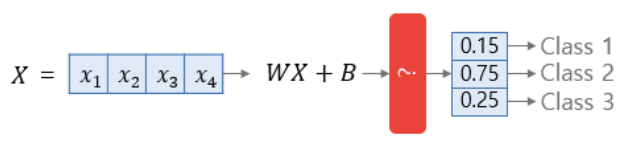

In [6]:
Image("./Images/다중클래스 분류 2.png", width = 500, height = 500)

결국 소프트맥스 회귀는 선택지 개수만큼의 차원을 가지는 벡터를 만들고, 해당 벡터의 모든 원소 합이 1이 되도록 원소들의 값을 변환시키는 어떤 함수를 지나게 만들어야 한다.

위의 그림은 붓꽃 품종 분류하기 문제 등과 같이 선택지의 개수가 3개일 때, 3차원 벡터가 어떤 함수를 지나 원소의 총 합이 1이 되도록 원소들의 값이 변환되는 모습을 보여준다.

우리는 이 함수를 **소프트맥스(Softmax)** 함수라고 한다.

$가설 : H(X) = softmax(WX + B)$

## <font color="orange">2. 소프트맥스 함수(Softmax function)</font>

소프트맥스 함수는 분류해야하는 정답지(클래스)의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정한다.

우선 수식에 대해 설명하고, 그 후에는 그림으로 이해해보도록 하자.

### 1) 소프트맥스 함수의 이해

$k$차원의 벡터에서 $i$번째 원소를 $z_i$, $i$번째 클래스가 정답일 확률을 $p_i$로 나타낸다고 하였을 때 소프트맥스 함수는 $p_i$를 다음과 같이 정의한다.

$$p_i = \frac{e^{z_i}}{\sum_{j=1}^k e^{z_i}}\ for\ i = 1, 2, ..., k$$

위에서 풀어야하는 문제에 소프트맥스 함수를 적용해보도록 하자.

위에서 풀어야하는 문제의 경우 $k=3$이므로 3차원 벡터 $z = [z_1 z_2 z_3]$의 입력을 받으면 소프트맥스 함수는 아래와 같은 출력을 리턴한다.

$$softmax(z) = [\frac{e^{z_1}}{\sum_{j=1}^3 e^{z_j}}\ \frac{e^{z_2}}{\sum_{j=1}^3 e^{z_j}}\ \frac{e^{z_3}}{\sum_{j=1}^3 e^{z_j}}] = [p_1, p_2, p_3] = \hat{y} = 예측값$$

$p_1, p_2, p_3$ 각각은 1번 클래스가 정답일 확률, 2번 클래스가 정답일 확률, 3번 클래스가 정답일 확률을 나타내며 **각각 0과 1사이의 값**으로 **총 합은 1이 된다.**

여기서 분류하고자하는 3개의 클래스는 virginica, setosa, versicolor이므로 이는 결국 주어진 입력이 virginica일 확률, setosa일 확률, versicolor일 확률을 나타내는 값을 의미한다.

여기서 $i$가 1일 때는 virginica일 확률을 나타내고, 2일 때는 setosa일 확률, 3일 때는 versicolor일 확률이라고 지정하도록 하자.

이 지정 순서는 문제를 풀고자 하는 사람의 무작위 선택이다. 이에 따라 식을 문제에 맞게 다시 쓰면 아래와 같다.

$$softmax(z) = [\frac{e^{z_1}}{\sum_{j=1}^3 e^{z_j}}\ \frac{e^{z_2}}{\sum_{j=1}^3 e^{z_j}}\ \frac{e^{z_3}}{\sum_{j=1}^3 e^{z_j}}] = [p_{ㅍvirginica}, p_{setosa}, p_{versicolor}]$$

**다시 말하자면, 분류하고자 하는 클래스가 $k$개일 때, $k$차원의 벡터를 입력받아서 모든 벡터 원소의 값을 0과 1사이의 값으로 변경하여 다시 $k$차원의 벡터를 리턴하는 것이다.**

### 2) 그림을 통한 이해

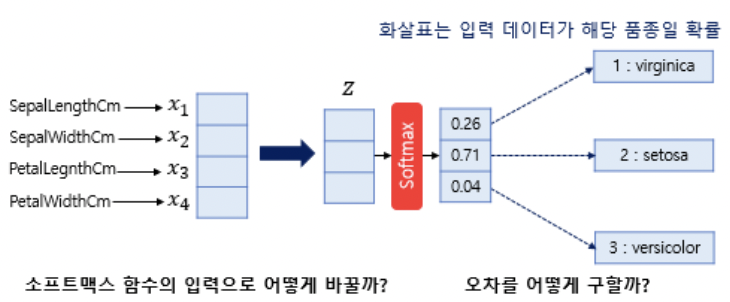

In [5]:
Image("./Images/소프트맥스 1.png", width = 500)

여기서는 샘플 데이터 1개씩 입력으로 받아 처리한다고 가정해보도록 하자. 즉, **배치 크기가 1**이다.<br><br>

위의 그림에는 두 가지 질문이 있다. 첫번째 질문은 **소프트맥스 함수의 입력**에 대한 질문이다.

하나의 샘플 데이터는 4개의 독립 변수 $x$를 가지는데 이는 모델이 4차원 벡터를 입력으로 받음을 의미한다.

그런데 소프트맥스의 함수 입력으로 사용되는 벡터는 벡터의 차원이 분류하고자 하는 클래스의 개수가 되어야 하므로 어떤 가충치 연산을 통해 3차원 벡터로 변환되어야 한다.

위의 그림에서는 소프트맥스 함수의 입력으로 사용되는 3차원 벡터를 $z$로 표현하였다.

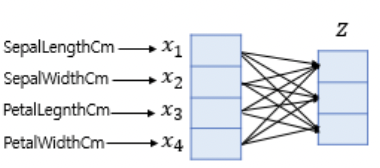

In [7]:
Image("./Images/소프트맥스 2.png", width = 300)

샘플 데이터 벡터를 소프트맥스 함수의 입력 벡터로 차원을 축소하는 방법은 간단하다.

소프트맥스 함수의 입력 벡터 $z$의 차원수만큼 결과값이 나오도록 가중치 곱을 진행한다.

위의 그림에서 화살표는 총 (4 X 3 = 12) 12개이며 전부 다른 가중치를 가지고, 학습 과정에서 점차적으로 오차를 최소화하는 가중치로 값이 변경된다.<br><br>

두번째 질문은 **오차 계산 방법**에 대한 질문이다.

소프트맥스 함수의 출력은 분류하고자하는 클래스의 개수만큼 차원을 가지는 벡터로 각 원소는 0과 1사이의 값을 가진다.

이 각각은 특정 클래스가 정답일 확률을 나타낸다.

여기서 첫번째 원소인 $p_1$은 virginica가 정답을 확률, 두번째 원소인 $p_2$는 setosa가 정답일 확률, 세번째 원소인 $p_3$은 versicolor가 정답일 확률로 고려하고자 한다.

그렇다면 이 예측값과 비교를 할 수 있는 실제값의 표현 방법이 있어야 한다.

소프트맥스 회귀에서는 실제값을 원-핫 벡터로 표현한다.

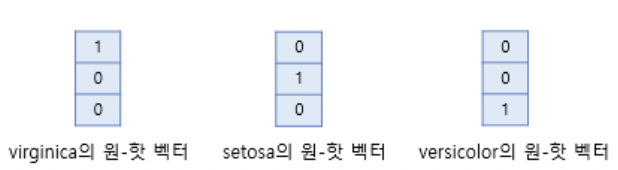

In [15]:
Image("./Images/소프트맥스 3.png", width = 500)

위의 그림은 소프트맥스 함수의 출력 벡터의 첫번째 원소 $p_1$가 virginica가 정답을 확률, 두번째 원소인 $p_2$가 setosa가 정답일 확률, 세번째 원소인 $p_3$가 versicolor가 정답일 확률을 의미한다고 하였을 때, 각 실제값의 정수 인코딩은 1, 2, 3이 되고 이에 원-핫 인코딩을 수행하여 실제값을 원-핫 벡터로 수치화한 것을 보여준다.

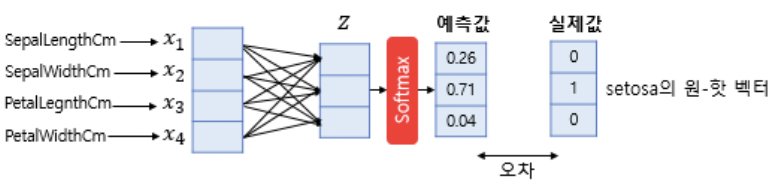

In [17]:
Image("./Images/소프트맥스 4.png", width = 600)

예를 들어 현재 풀고 있는 샘플 데이터의 실제값이 setosa라면 setosa의 원-핫 벡터는 [0 1 0]이다.

이 경우, 예측값과 실제값의 오차가 0이 되는 경우는 소프트맥스 함수의 결과가 [0 1 0]이 되는 경우이다.

이 두 벡터의 오차를 계산하기 위해서 소프트맥스 회귀는 비용 함수로 **크로스 엔트로피 함수**를 사용하는데, 이는 뒤에서 비용 함수를 설명하는 부분에서 다시 살펴보도록 한다.

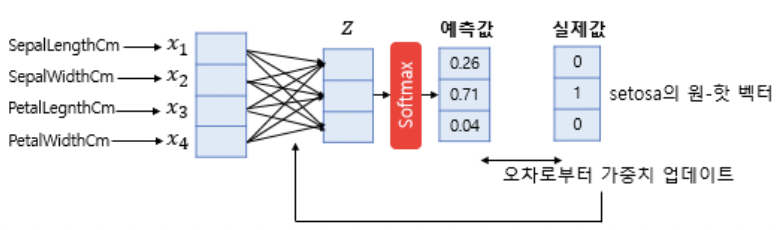

In [19]:
Image("./Images/소프트맥스 5.png", width = 600)

이제 앞서 배운 선형 회귀나 로지스틱 회귀와 마찬가지로 오차로부터 가중치를 업데이트 한다.

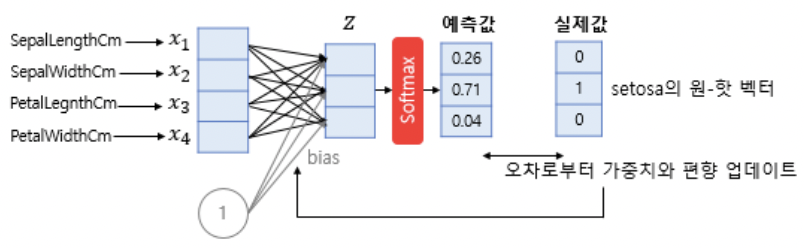

In [20]:
Image("./Images/소프트맥스 6.png", width = 600)

더 정확히는 선형 회귀나 로지스틱 회귀와 마찬가지로 편향 또는 업데이트의 대상이 되는 매개 변수이다.

소프트맥스 회귀를 벡터와 행렬 연산으로 이해해보도록 하자.

입력을 특성 수만큼의 차원을 가진 입력 벡터 $X$라고 하고, 가중치 행렬을 $W$, 편향을 $B$라고 하였을 때, 소프트맥스 회귀에서 예측값을 구하는 과정을 벡터와 행렬 연산으로 표현하면 아래와 같다.

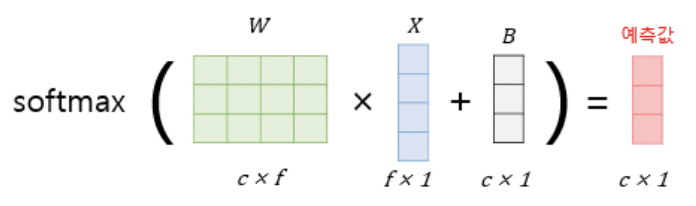

In [23]:
Image("./Images/소프트맥스 7.png", width = 600)

여기서 $f$는 특성의 수이며, $c$는 클래스의 개수에 해당된다.

## <font color="orange">3. 붓꽃 품종 분류하기 행렬 연산으로 이해하기</font>

위의 붓꽃 품종 분류 문제의 가설식을 행렬 연산으로 표현해보도록 한다.

우선 위의 예제 데이터는 전체 샘플의 개수가 5개, 특성이 4개이므로 5 X 4 행렬 $X$로 정의한다.

$X = \begin{pmatrix} 5.1\ 3.5\ 1.4\ 0.2 \\ 4.9\ 3.0\ 1.4\ 0.2 \\ 5.8\ 2.6\ 4.0\ 1.2 \\ 6.7\ 3.0\ 5.2\ 2.3 \\ 5.6\ 2.8\ 4.9\ 2.0 \end{pmatrix}$

편의를 위해 각 행렬의 원소 위치를 반영한 변수로 표현하도록 한다.

이번 문제는 선택지가 총 3개인 문제이므로 가설의 예측값으로 얻는 행렬 $\hat{Y}$의 열의 개수는 3개여야 한다.

그리고 각 행은 행렬 $X$의 각 행의 예측값이므로 행의 크기는 동일해야 한다.

결과적으로 행렬 $\hat{Y}$의 크기는 5 $\times$ 3 이다.

$\hat{Y} = \begin{pmatrix} y_{11} y_{12} y_{13} \\ y_{21} y_{22} y_{23} \\ y_{31} y_{32} y_{33} \\ y_{41} y_{42} y_{43} \\ y_{51} y_{52} y_{53} \end{pmatrix}$

크기 5 $\times$ 3 행렬 $\hat{Y}$는 크기 5 $\times$ 4 입력 행렬 $X$과 가중치 행렬 $W$의 곱으로 얻어지는 행렬이므로 가중치 행렬 $W$의 크기는 추정을 통해 4 $\times$ 3의 크기를 가진 행렬임을 알 수 있다.

$W = \begin{pmatrix} w_{11} w_{12} w_{13} \\ w_{21} w_{22} w_{23} \\ w_{31} w_{32} w_{33} \\ w_{41} w_{42} w_{43} \end{pmatrix}$

편향 행렬 $B$는 예측값 행렬 $\hat{Y}$와 크기가 동일해야 하므로 5 $\times$ 3의 크기를 가진다.

$B = \begin{pmatrix} b_1 b_2 b_3 \\ b_1 b_2 b_3 \\ b_1 b_2 b_3 \\ b_1 b_2 b_3 \\ b_1 b_2 b_3 \end{pmatrix}$

결과적으로 가설식은 다음과 같다.

$\hat{Y} = softmax(XW + B)$

## <font color="orange">4. 비용 함수(Cost function)</font>

소프트맥스 회귀에서는 비용 함수로 **크로스 엔트로피** 함수를 사용한다.

여기서는 소프트맥스 회귀에서의 크로스 엔트로피 함수뿐만 아니라, 다양한 표기 방법에 대해서 이해보도록 하자.

### 1) 크로스 엔트로피 함수

아래에서 $y$는 실제값을 나타내며, $k$는 클래스의 개수로 정의한다.

$y_j$는 실제값 원-핫 벡터의 $j$번째 인덱스를 의미하며, $p_j$는 샘플 데이터가 $j$번째 클래스일 확률을 나타낸다.

표기에 따라서 $\hat{y_j}$로 표현하기도 한다.

$$cost(W) = -\sum_{j=1}^k y_j log(p_j)$$

위의 함수가 왜 비용 함수로 적합한지 알아보도록 하자.

$c$가 실제값 원-핫 벡터에서 1을 가진 원소의 인덱스라고 한다면, $p_c = 1$은 $\hat{y}$가 $y$를 정확하게 예측한 경우가 된다.

이를 식에 대입해보면 $-1log(1) = 0$이 되기 때문에, 결과적으로 $\hat{y}$가 $y$를 정확하게 예측한 경우의 크로스 엔트로피 함수의 값은 0이 된다.

**즉, $-\sum_{j=1}^k y_jlog(p_j)$이 값을 최소화하는 방향으로 학습해야 한다.**<br><br>

이제 이를 $n$개의 전체 데이터에 대한 평균을 구한다고 하면 최종 비용 함수는 다음과 같다.

$$cost(W) = -\frac{1}{n}\sum_{i=1}^n \sum_{j=1}^k y_{j}^{(i)} log(p_{j}^{(i)})$$

### 2) 이진 분류에서의 크로스 엔트로피 함수

로지스틱 회귀에서 배운 크로스 엔트로피 함수식과 달라보이지만, 본질적으로는 동일한 함수식이다.

로지스틱 회귀의 크로스 엔트로피 함수식으로부터 소프트맥스 회귀의 크로스 엔트로피 함수식을 도출해보도록 하자.

$$cost(W) = -[ylogH(X) + (1 - y)log(1 - H(X))]$$

위의 식은 앞서 로지스틱 회귀에서 배웠던 크로스 엔트로피의 함수식을 보여준다.

위의 식에서 $y$를 $y_1$, $y-1$을 $y_2$로 치환하고 $H(X)$를 $p_1$, $ - H(X)$를 $p_2$로 치환해보도록 하자.

결과적으로 아래의 식을 얻을 수 있다.

$$-(y_1log(p_1) + y_2log(p_2))$$

이 식은 아래와 같이 표현할 수 있다.

$$-(\sum_{i = 1}^2 y_i logp_i)$$

소프트맥스 회귀에서는 $k$의 값이 고정된 값이 아니므로 2를 $k$로 변경한다.

$$-(\sum_{i=1}^k y_i logp_i)$$

위의 식은 결과적으로 소프트맥스 회귀의 식과 동일하다.

역으로 소프트맥스 회귀에서 로지스틱 회귀의 크로스 엔트로피 함수식을 얻는 것은 $k$를 2로 하고, $y_1$과 $y_2$를 각각 $y$와 $1 - y$로 치환하고, $p_1$와 $p_2$를 각각 $H(X)$와 $1 - H(X)$로 치환하면 된다.<br><br>

정리하면 소프트맥스 함수의 최종 비용 함수에서 $k$가 2라고 가정하면 결국 로지스틱 회귀의 비용 함수와 같다.

# <font color="brown">03. 소프트맥스 회귀의 비용 함수 구현하기</font>

----

이번 챕터에서는 소프트맥스 회귀의 비용 함수를 구현해보도록 하자.

In [51]:
# 라이브러리 불러오기
import torch
import torch.nn.functional as F

In [52]:
torch.manual_seed(1)

## <font color="orange">1. 파이토치로 스프트맥스의 비용 함수 구현하기 (로우-레벨)</font>

소프트맥스 회귀를 구현함에 있어 우선 소프트맥스 함수의 비용 함수를 로우-레벨로 구현해보도록 하자.

3개의 원소를 가진 벡터 텐서를 정의하고, 이 텐서를 통해 소프트맥스 함수를 이해해보도록 한다.

In [53]:
# 입력 벡터 정의
z = torch.FloatTensor([1, 2, 3])

이 텐서를 소프트맥스 함수의 입력으로 사용하고, 그 결과를 확인해보도록 하자.

In [54]:
hypothesis = F.softmax(z, dim = 0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


3개 원소의 값이 0과 1사이의 값을 가지는 벡터로 변환된 것을 볼 수 있다.

이 원소들의 합이 1인지 확인해보도록 하자.

- **torch.nn.functional** 모듈의 `softmax` 함수는 소프트맥스 함수가 정의되어 있다.

- `dim` 매개변수는 소프트맥스 함수를 통해 계산을 수행할 차원을 의미한다.

In [55]:
print("Softmax 함수 결과값들의 합 :", hypothesis.sum().item())

Softmax 함수 결과값들의 합 : 1.0


총 원소의 합은 1이다. 이번에는 비용 함수를 직접 구현해보도록 하자.

우선 임의의 3 $\times$ 5 행렬의 크기를 가진 텐서를 만들도록 하자.

In [56]:
z = torch.rand(3, 5, requires_grad = True)
z

tensor([[0.7576, 0.2793, 0.4031, 0.7347, 0.0293],
        [0.7999, 0.3971, 0.7544, 0.5695, 0.4388],
        [0.6387, 0.5247, 0.6826, 0.3051, 0.4635]], requires_grad=True)

이제 이 텐서에 대해서 소프트맥스 함수를 적용한다.

단, 각 샘플에 대해서 소프트맥스 함수를 적용하여야 하므로 두번째 차원에 대해서 소프트맥스 함수를 적용한다는 의미에서 `dim = 1`을 써주도록 한다.

In [57]:
hypothesis = F.softmax(z, dim = 1)
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [58]:
# 각 행 원소들의 합 구하기
print(hypothesis.sum(dim = 1))

tensor([1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)


이제 각 행의 원소들 합은 1이 되는 텐서로 변환되었다.

소프트맥스 함수의 출력값은 결국 예측값이다.

**즉, 위 텐서는 3개의 샘플에 대해서 5개의 클래스 중 어떤 클래스가 정답인지를 예측한 결과이다.**<br><br>

이제 각 샘플에 대해서 임의의 레이블을 만들도록 한다.

In [59]:
y = torch.randint(5, (3,)).long()
print(y)

tensor([0, 2, 1])


이제 각 레이블에 대해서 원-핫 인코딩을 수행한다.

- `long()` 메서드를 사용하면 int 타입의 텐서로 변경해준다.

In [63]:
# 모든 원소가 0의 값을 가진 3 x 5 텐서 생성
y_one_hot = torch.zeros_like(hypothesis)
print(y_one_hot, "\n")

# 각 레이블에 대해서 원-핫 인코딩 수행
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]) 



tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

위의 연산에서 어떻게 원-핫 인코딩이 수행되었는지 보도록 하자.

우선, `torch.zeros_like(hypothesis)`를 통해 모든 원소가 0의 값을 가진 3 $\times$ 5 텐서를 만든다.

그리고 이 텐서는 **y_one_hot**에 저장이 된 상태이다.<br><br>

`y.unsqueeze(1)`를 하면 (3,)의 크기를 가졌던 $y$ 텐서는 (3 $\times$ 1) 텐서가 된다.

즉, 다시말해서 `y.unsqueeze(1)`의 결과는 아래와 같다.

In [64]:
print(y.unsqueeze(1))

tensor([[0],
        [2],
        [1]])


그리고 `scatter` 첫번째 인자로 `dim = 1`에 대해서 수행하라고 알려주었다.

세번째 인자에 숫자 1을 넣어주므로서 두번째 인자인 `y_unsqueeze(1)`이 알려주는 위치에 숫자 1을 넣도록 한다.

앞서 텐서 조작하기 2챕터에서 연산 뒤에 **_** 를 붙이면 In-place Operation임을 배운 바 있다.

이에 따라서 **y_one_hot**의 최종 결과는 결국 아래와 같다.

In [65]:
print(y_one_hot)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])


이제 비용 함수 연산을 위한 재료들을 모두 준비하였다.

소프트맥스 회귀의 비용 함수는 다음과 같다.

$cost(W) = -\frac{1}{n}\sum_{i=1}^n\sum_{j=1}^k y_j^{(i)}log(p_j^{(i)})$

마이너스 부호를 뒤로 빼면 다음 식과도 동일하다.

$cost(W) = \frac{1}{n}\sum_{i=1}^n\sum_{j=1}^k y_j^{(i)} \times (-log(p_j^{(i)}))$

이를 코드로 구현하면 아래와 같다.

In [67]:
# 비용 함수 계산
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim = 1).mean()
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


## <font color="orange">2. 파이토치로 소프트맥스의 비용 함수 구현하기 (하이-레벨)</font>

이제 소프트맥스의 비용 함수를 좀 더 하이-레벨로 구현하는 방법에 대해서 알아보도록 하자.

### 1) F.sortmax() + torch.log() = F.log_softmax()

앞서 소프트맥스 함수의 결과에 로그를 씌울 때는 다음과 같이 소프트맥스 함수의 출력값을 로그 함수의 입력으로 사용하였다.

In [69]:
# Low level
print(torch.log(F.softmax(z, dim = 1)))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward0>)


그런데 파이토치에서는 두 개의 함수를 결합한 `F.log_softmax()`라는 도구를 제공한다.

In [70]:
# High level
print(F.log_softmax(z, dim = 1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)


두 출력 결과가 동일한 것을 볼 수 있다.

이제 비용 함수를 확인해보도록 하자.

### 2) F.log_softmax() + F.nll_loss() = F.cross_entropy()

앞서 로우-레벨로 구현한 비용 함수는 다음과 같다.

In [74]:
# Low level
print((y_one_hot * -torch.log(F.softmax(z, dim = 1))).sum(dim = 1).mean())

tensor(1.4689, grad_fn=<MeanBackward0>)


그런데 위의 수식에서 `torch.log(F.softmax(z, dim = 1))`를 방금 배운 `F.log_softmax()`로 대체할 수 있다.

In [78]:
# 'F.log_softmax()' 함수 사용
print((y_one_hot * -F.log_softmax(z, dim = 1)).sum(dim = 1).mean())

tensor(1.4689, grad_fn=<MeanBackward0>)


이를 더 간단하게 하면 다음과 같다.

`F.nll_loss()`를 사용할 때는 원-핫 벡터를 넣을 필요없이 바로 실제값을 인자로 사용한다.

In [80]:
# High level : 'F.nll_loss()' 사용
print(F.nll_loss(F.log_softmax(z, dim = 1), y))

tensor(1.4689, grad_fn=<NllLossBackward0>)


여기서 **nll**이란 Negative Log Likelihood의 약자이다.

위에서 **nll_loss**는 `F.log_softmax()`를 수행한 후에 남은 수식들을 수행한다.

이를 더 간단하게 하면 다음과 같이 사용할 수 있다.

`F.cross_entropy()`는 `F.log_softmax()`와 `F.nll_loss()`를 포함하고 있다.

In [81]:
# 'F.cross_entropy()' 함수 사용
print(F.cross_entropy(z, y))

tensor(1.4689, grad_fn=<NllLossBackward0>)


- **F.cross_entropy()는 비용 함수에 소프트맥스 함수까지 포함하고 있음을 기억해야 한다.**

# <font color="brown">04. 소프트맥스 회귀 구현하기</font>

---

이번 챕터에서는 소프트맥스 회귀를 로우-레벨과 `F.cross_entropy`를 사용해서 구현해보도록 하자.

In [82]:
# 필요 라이브러리 불러오기
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [83]:
torch.manual_seed(1)

훈련 데이터와 레이블을 텐서로 선언한다.

In [89]:
# 훈련 데이터와 레이블 생성
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]

y_train = [2, 2, 2, 1, 1, 1, 0, 0]

# 텐서로 변경
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

x_train의 각 샘플은 4개의 특성을 가지고 있으며, 총 8개의 샘플이 존재한다.

y_train은 각 샘플에 대한 레이블을 나타내는데, 여기서는 0, 1, 2의 값을 가지는 것으로 보아 총 3개의 클래스가 존재한다.

## <font color="orange">1. 소프트맥스 회귀 구현하기 (로우-레벨)</font>

In [91]:
print("Shape of x_train tensor :", x_train.shape, "\n")
print("x_train tensor :\n\n", x_train, "\n")

print("Shape of y_train tensor :", y_train.shape, "\n")
print("y_train tensor :\n\n", y_train)

Shape of x_train tensor : torch.Size([8, 4]) 

x_train tensor :

 tensor([[1., 2., 1., 1.],
        [2., 1., 3., 2.],
        [3., 1., 3., 4.],
        [4., 1., 5., 5.],
        [1., 7., 5., 5.],
        [1., 2., 5., 6.],
        [1., 6., 6., 6.],
        [1., 7., 7., 7.]]) 

Shape of y_train tensor : torch.Size([8]) 

y_train tensor :

 tensor([2, 2, 2, 1, 1, 1, 0, 0])


x_train의 크기는 8 $\times$ 4 이며, y_train의 크기는 8 $\times$ 1 이다.

그런데 최종 사용할 레이블은 y_train에서 원-핫 인코딩을 한 결과이어야 한다.

클래스의 개수는 3개이므로 y_train에 원-핫 인코딩한 결과는 8 $\times$ 3의 개수를 가져야 한다.

In [101]:
# 원-핫 벡터 생성
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)

print("Shape of One-hot Vector :", y_one_hot.shape, "\n")
print("One-hot Vector :\n\n", y_one_hot)

Shape of One-hot Vector : torch.Size([8, 3]) 

One-hot Vector :

 tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])


y_train에서 원-핫 인코딩을 한 결과인 **y_one_hot**의 크기는 8 $\times$ 3이다.

즉, $W$ 행렬의 크기는 4 $\times$ 3이어야 한다.

$W$와 $b$를 선언하고, 옵티마이저로는 경사 하강법을 사용한다.

그리고 학습률을 0.1로 설정하도록 한다.

In [103]:
# 모델 초기화
W = torch.zeros(4, 3, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

# Optimizer 설정
optimizer = optim.SGD([W, b], lr = 0.1)

`F.softmax()`와 `torch.log()`를 사용하여 가설과 비용 함수를 정의하고, 총 1,000번의 에포크를 수행한다.

In [105]:
nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    
    # 가설 계산
    hypothesis = F.softmax(x_train.matmul(W) + b, dim = 1)
    
    # Cost 계산
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim = 1).mean()
    
    # Cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} Cost : {:.6f}".format(epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost : 1.032775
Epoch  100/1000 Cost : 0.712104
Epoch  200/1000 Cost : 0.637315
Epoch  300/1000 Cost : 0.590370
Epoch  400/1000 Cost : 0.553425
Epoch  500/1000 Cost : 0.521421
Epoch  600/1000 Cost : 0.492227
Epoch  700/1000 Cost : 0.464692
Epoch  800/1000 Cost : 0.438060
Epoch  900/1000 Cost : 0.411747
Epoch 1000/1000 Cost : 0.385264


## <font color="orange">2. 소프트맥스 회귀 구현하기 (하이-레벨)</font>

이제는 `F.cross_entropy()`를 사용하여 비용 함수를 구현해보도록 하자.

주의할 점은 `F.cross_entropy()`는 그 자체로 소프트맥스 함수를 포함하고 있으므로 가설에서는 소프트맥스 함수를 사용할 필요가 없다.

In [107]:
# 모델 초기화
W = torch.zeros(4, 3, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

# Optimizer 설정
optimizer = optim.SGD([W, b], lr = 0.1)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)
    
    # Cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} Cost : {:.6f}".format(epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost : 1.098612
Epoch  100/1000 Cost : 0.761050
Epoch  200/1000 Cost : 0.689991
Epoch  300/1000 Cost : 0.643229
Epoch  400/1000 Cost : 0.604117
Epoch  500/1000 Cost : 0.568255
Epoch  600/1000 Cost : 0.533922
Epoch  700/1000 Cost : 0.500291
Epoch  800/1000 Cost : 0.466908
Epoch  900/1000 Cost : 0.433507
Epoch 1000/1000 Cost : 0.399962


## <font color="orange">3. 소프트맥스 회귀 nn.Module로 구현하기</font>

이번에는 `nn.Module`로 소프트맥스 회귀를 구현해보도록 한다.

선형 회귀에서 구현에 사용했던 `nn.Linear()`를 사용한다.

output_dim이 1이었던 선형 회귀때와 달리 이제 클래스의 개수여야 한다.

In [108]:
# 모델 선언 및 초기화, 4개의 특성을 가지고 있으며 3개의 클래스로 분류
model = nn.Linear(4, 3)

In [109]:
# Optimizer 설정
optimizer = optim.SGD(model.parameters(), lr = 0.1)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # Cost 계산
    cost = F.cross_entropy(prediction, y_train)
    
    # Cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} Cost : {:.6f}".format(epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost : 1.616785
Epoch  100/1000 Cost : 0.658891
Epoch  200/1000 Cost : 0.573443
Epoch  300/1000 Cost : 0.518151
Epoch  400/1000 Cost : 0.473265
Epoch  500/1000 Cost : 0.433516
Epoch  600/1000 Cost : 0.396563
Epoch  700/1000 Cost : 0.360914
Epoch  800/1000 Cost : 0.325392
Epoch  900/1000 Cost : 0.289178
Epoch 1000/1000 Cost : 0.254148


## <font color="orange">4. 소프트맥스 회귀 클래스로 구현하기</font>

이제 소프트맥스 회귀를 `nn.Module`을 상속받은 클래스로 구현해보도록 하자.

In [110]:
class SoftmaxClassifierModel(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        self.linear = nn.Linear(4, 3)
        
    def forward(self, x):
        return self.linear(x)

In [111]:
# 모델 객체 생성
model = SoftmaxClassifierModel()

In [112]:
# Optimizer 설정
optimizer = optim.SGD(model.parameters(), lr = 0.1)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    
    prediction = model(x_train)
    
    cost = F.cross_entropy(prediction, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} Cost : {:.6f}".format(epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost : 2.637636
Epoch  100/1000 Cost : 0.647903
Epoch  200/1000 Cost : 0.564643
Epoch  300/1000 Cost : 0.511043
Epoch  400/1000 Cost : 0.467249
Epoch  500/1000 Cost : 0.428281
Epoch  600/1000 Cost : 0.391924
Epoch  700/1000 Cost : 0.356742
Epoch  800/1000 Cost : 0.321577
Epoch  900/1000 Cost : 0.285617
Epoch 1000/1000 Cost : 0.250818


# <font color="brown">05. 소프트맥스 회귀로 MNIST 데이터 분류하기</font>

---

이번 챕터에서는 MNIST 데이터에 대해서 이해하고, 파이토치(PyTorch)로 소프트맥스 회귀를 구현하여 MNIST 데이터를 분류하는 실습을 진행해보도록 한다.

## <font color="orange">1. MNIST 데이터 이해하기</font>

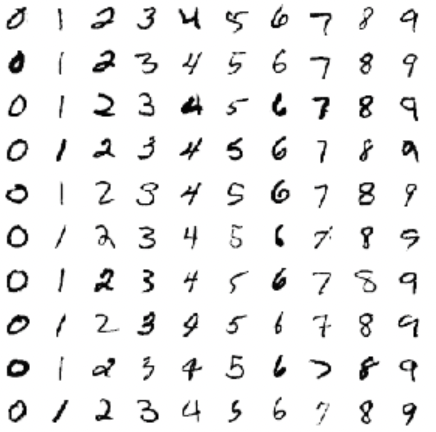

In [116]:
Image("./Images/MNIST 데이터 1.png", width = 300)

MNIST는 숫자 0부터 9까지의 이미지로 구성된 손글씨 데이터셋이다.

이 데이터는 과거에 우체국에서 편지의 우편 번호를 인식하기 위해서 만들어진 훈련 데이터이다.

총 60,000개의 훈련 데이터와 레이블, 총 10,000개의 테스트 데이터와 레이블로 구성되어져 있다.

레이블은 0부터 9까지 총 10개이다.

이 예제는 머신 러닝을 처음 배울 때 접하게 되는 가장 기본적인 예제이기도 하다.<br><br>

MNIST 문제는 손글씨로 적힌 숫자 이미지가 들어오면, 그 이미지가 무슨 숫자인지 맞추는 문제이다.

예를 들어, 숫자 5의 이미지가 입력으로 들어오면 이게 숫자 5다! 라는 것을 맞춰야 한다.

이 문제는 사람에게는 굉장히 간단하지만 기계에게는 그렇지가 않다.<br><br>

우선 MNIST 문제를 더 자세히 보도록 하자.

각각의 이미지는 아래와 같이 28 픽셀 $\times$ 28 픽셀의 이미지이다.

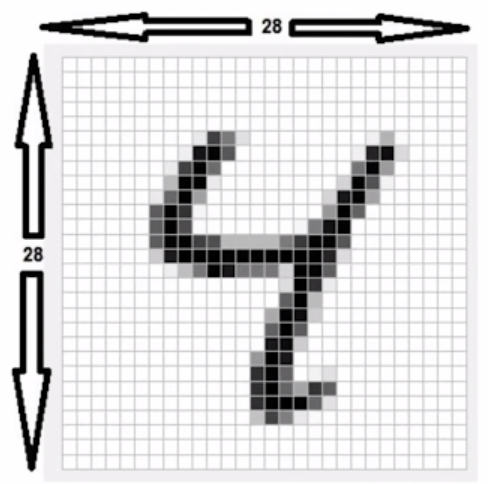

In [117]:
Image("./Images/MNIST 데이터 2.png", width = 300)

이 문제를 풀기 위해 여기서는 28 픽셀 $\times$ 28 픽셀 = 784 픽셀이므로, 각 이미지를 총 784의 원소를 가진 벡터로 만들어줘야 한다.

이렇게 되면 총 784개의 특성을 가진 샘플이 되는데, 이는 앞서 우리가 풀었던 그 어떤 문제들보다 특성이 굉장히 많은 샘플이다.

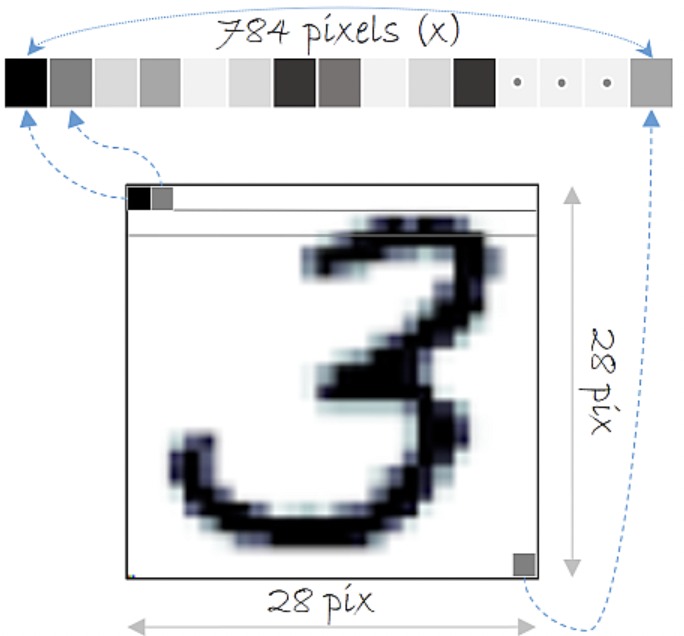

In [118]:
Image("./Images/MNIST 데이터 3.png", width = 400)

784 차원의 벡터로 만드는 코드를 미리보기로 보면 아래와 같다.

```python
for X, Y in data_loader:
    
    # 입력 이미지를 [batch size x 784]의 크기로 reshape
    # 레이블은 원-핫 인코딩
    X = X.vies(-1, 28 * 28)
```

위의 코드에서 X는 for문에서 호출될 떄는 (배치 크기 $\times$ 28 $\times$ 28)의 크기를 가지지만, `view`를 통해서 (배치크기 $\times$ 794)의 크기로 변환된다.

## <font color="orange">2. 토치비전(torchvision) 소개하기</font>

본격적인 실습에 들어가기에 앞서 토치비전(torchvision)이라는 도구에 대해서 알아보도록 하자.

**torchvision**은 유명한 데이터셋들, 이미 구현되어져 있는 유명한 모델들, 일반적인 이미지 전처리 도구들을 포함하고 있는 패키지이다.

아래의 링크는 torchvision에 어떤 데이터셋들과 모델들 그리고 어떤 전처리 방법들을 제공하고 있는지 보여준다.

[PyTorch torchvision](https://pytorch.org/vision/stable/index.html)

## <font color="orange">3. 분류기 구현을 위한 사전 설정</font>

In [119]:
# 필요 라이브러리 불러오기
import random

import torch
import torch.nn as nn

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
%matplotlib inline

현재 환경에서 GPU 연산이 가능하다면 GPU 연산을 하고, 그렇지 않다면 CPU 연산을 하도록 한다.

현재 GPU 연산이 불가능하므로, CPU 연산 수행

In [120]:
# GPU를 사용 가능하면 True, 사용 불가능하면 False
USE_CUDA = torch.cuda.is_available()

# GPU 사용 가능하면 사용하고 아니면 CPU 사용
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습합니다 :", device)

다음 기기로 학습합니다 : cpu


위의 방법은 앞으로 자주 쓰이게 되므로 기억해두도록 하자!<br><br>

랜덤 시드를 고정한다.

In [121]:
random.seed(777)
torch.manual_seed(777)

if device == "cuda":
    torch.cuda.manual_seed_all(777)

모델을 학습하면서 조정할 하이퍼파라미터를 변수로 생성한다.

In [122]:
# Hyperparameters
training_epochs = 15
batch_size = 100

## <font color="orange">4. MNIST 분류기 구현하기</font>

`torchvision.datasets.MNIST`를 사용하여 MNIST 데이터셋을 불러올 수 있다.

In [123]:
# MNIST dataset
mnist_train = datasets.MNIST(root = "./MNIST data/",
                             train = True,
                             transform = transforms.ToTensor(),
                             download = True)

mnist_test = datasets.MNIST(root = "./MNIST data/",
                            train = False,
                            transform = transforms.ToTensor(),
                            download = True)

31.0%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

66.5%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)


15.0%

100.0%


Extracting ./MNIST data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST data/MNIST/raw



112.7%

Extracting ./MNIST data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST data/MNIST/raw



- 첫번째 인자 `root`는 MNIST 데이터를 다운로드 받을 경로를 의미한다.

- 두번째 인자 `train`은 True를 주면 MNIST의 훈련 데이터를 리턴받으며 False를 주면 테스트 데이터를 리턴받는다.

- 세번째 인자 `transform`의 **ToTensor()** 는 파이토치 텐서로 변환시켜주며 [0, 1] 사이의 값으로 반환한다.

- 네번째 인자 `download`는 해당 경로에 MNIST 데이터가 없다면 다운로드 받겠다는 의미이다.

이렇게 데이터를 다운로드했다면 앞서 미니 배치와 데이터로드 챕터에서 학습했던 데이터로더(DataLoader)를 사용한다.

In [133]:
print("Shape of training data tensor :", mnist_train.data.shape, "\n")
print("Unique labels of training data :", mnist_train.targets.unique())

Shape of training data tensor : torch.Size([60000, 28, 28]) 

Unique labels of training data : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [134]:
# Data Loader
data_loader = DataLoader(dataset = mnist_train,
                         batch_size = batch_size,
                         shuffle = True,
                         drop_last = True)

이때 `DataLoader`에는 4개의 인자가 있다.

- 첫번째 인자인 `dataset`은 로드할 대상을 의미한다.

- 두번째 인자인 `batch_size`는 배치 크기를 의미한다.

- 세번째 인자인 `shuffle`은 매 에포크마다 미니 배치를 셔플할 것인지의 여부를 나타낸다.

- 네번째 인자인 `drop_last`는 마지막 배치를 버릴 것인지를 의미한다.

**`drop_last`를 하는 이유를 이해하기 위해서 1,000개의 데이터가 있다고 했을 때, 배치 크기가 128이라고 가정해보도록 하자.**

**1,000을 128로 나누면 총 7개가 나오고 나머지로 104개가 남는다.**

**이때 104개를 마지막 배치로 한다고 하였을 때, 128개를 충족하지 못하였으므로 104개를 그냥 버릴 수도 있다.**

**마지막 배치를 버리러면 `drop_last = True`를 해주면 된다.**

**이는 다른 미니 배치보다 개수가 적은 마지막 배치를 경사 하강법에 사용하여 마지막 배치가 상대적으로 과대 평가되는 현상을 막아준다.**<br><br>

이제 모델을 설계하도록 하자. **input_dim**은 784이고, **output_dim**은 10이다.

In [165]:
# 모델 설정
model = nn.Linear(784, 10, bias = True).to(device)

`to()` 함수는 연산을 어디서 수행할지를 정해준다.

`to()` 함수는 모델의 매개변수를 지정한 장치의 메모리로 보낸다.

CPU를 사용할 경우에는 필요가 없지만, GPU를 사용하려면 **to('cuda')** 를 해주어야 한다.

아무것도 지정하지 않은 경우에는 CPU 연산이라고 생각하면 된다.

`bias`는 편향 $b$를 사용할 것인지를 나타낸다.

기본값은 True 이므로 굳이 할 필요는 없지만, 명시적으로 True를 해주었다.<br><br>

이제 비용 함수와 옵티마이저를 정의하도록 한다.

In [166]:
# 비용 함수 정의
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있다.

# Optimizer 설정
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

앞서 소프트맥스 회귀를 배울 때는 `torch.nn.functional.cross_entropy()`를 사용하였으나, 여기서는 `torch.nn.CrossEntropyLoss()`를 사용하고 있다.

둘 다 파이토치에서 제공하는 크로스 엔트로피 함수로 둘 다 소프트맥스 함수를 포함하고 있다.

In [167]:
# 앞서 'training_epochs = 15'로 지정함
for epoch in range(training_epochs):
    
    # 한 Epoch 마다 비용 함수의 값을 저장하기 위한 변수 생성
    avg_cost = 0
    
    # 60,000개의 데이터에서 'Batch Size = 100'이므로, 아래의 값은 600이다.
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수
        Y = Y.to(device)
        
        # 모델의 gradient 값을 0으로 지정
        optimizer.zero_grad()
        
        # 모델의 결과값 저장
        hypothesis = model(X)
        
        # output과 target의 loss 계산
        cost = criterion(hypothesis, Y)
        
        # backward 함수를 호출하여 gradient 계산
        cost.backward()
        
        # 모델의 학습 파라미터 갱신
        optimizer.step()
        
        # 각 미니 배치의 loss 값에  iteration을 나누어 누적해준다.
        # 이 과정을 반복하면 한 Epoch의 비용 함수 값이 나온다.
        avg_cost += cost / total_batch
        
    print("Epoch {} Cost : {:.9f}".format(epoch + 1, avg_cost))

Epoch 1 Cost : 0.534997761
Epoch 2 Cost : 0.359179646
Epoch 3 Cost : 0.331132919
Epoch 4 Cost : 0.316649318
Epoch 5 Cost : 0.307162315
Epoch 6 Cost : 0.300143391
Epoch 7 Cost : 0.295026094
Epoch 8 Cost : 0.290812850
Epoch 9 Cost : 0.287320584
Epoch 10 Cost : 0.284527838
Epoch 11 Cost : 0.281964839
Epoch 12 Cost : 0.279662877
Epoch 13 Cost : 0.277628809
Epoch 14 Cost : 0.275914431
Epoch 15 Cost : 0.274361670


In [173]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
# 'torch.no_grad()'를 하면 gradient 계산을 수행하지 않는다.
with torch.no_grad():
    
    X_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.targets.to(device)
    
    # 학습한 모델을 사용하여 예측
    prediction = model(X_test)
    
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy :", accuracy.item())

Accuracy : 0.8877999782562256


소프트맥스 회귀를 사용하여 MNIST 데이터를 분류한 결과, 약 89% 정확도를 보이고 있다.

학습된 모델의 과적합 여부를 판단하기 위해서 학습 데이터와 테스트 데이터 각각의 정확도를 확인해보도록 하자.

In [188]:
# 과적합 여부 판단
with torch.no_grad():
    
    # 학습 데이터 분류
    X_train = mnist_train.data.view(-1, 28 * 28).float().to(device) # torch.Size([60000, 784])
    y_train = mnist_train.targets.to(device)
    
    # 테스트 데이터 분류
    X_test = mnist_test.data.view(-1, 28 * 28).float().to(device) # torch.Size([10000, 784])
    y_test = mnist_test.targets.to(device)
    
    # 학습된 모델을 사용하여 예측
    train_predict = model(X_train)
    test_predict = model(X_test)
    
    # 정확도를 계산하기 위한 과정
    train_correct = torch.argmax(train_predict, 1) == y_train
    train_accuracy = train_correct.float().mean()
    
    test_correct = torch.argmax(test_predict, 1) == y_test
    test_accuracy = test_correct.float().mean()
    
    print("Train Accuracy {:.9f}".format(train_accuracy.item()), "\n")
    print("Test Accuracy {:.9f}".format(test_accuracy.item()))

Train Accuracy 0.885133326 

Test Accuracy 0.887799978


학습 데이터의 정확도는 0.885133326 이고, 테스트 데이터의 정확도는 0.887799978 이다.

별로 차이가 나지 않는 것으로 보아, 과적합되지 않았음을 알 수 있다.

Random Number : 6039 

Label : 9 

Prediction : 9 



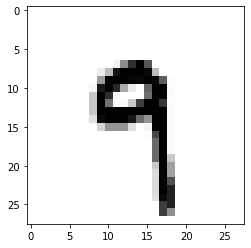

In [209]:
# MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측 수행
with torch.no_grad():
    
    # 임의의 숫자 생성
    r = random.randint(0, len(mnist_test) - 1)
    print("Random Number :", r, "\n")
    
    X_single_data = mnist_test.data[r : r + 1].view(-1, 28 * 28).float().to(device) # torch.Size([1, 784])
    Y_single_data = mnist_test.targets[r : r + 1].to(device)
    
    print("Label :", Y_single_data.item(), "\n")
    
    # 학습된 모델을 통해 예측
    single_prediction = model(X_single_data)
    print("Prediction :", torch.argmax(single_prediction, 1).item(), "\n")
    
    plt.imshow(mnist_test.data[r : r + 1].view(28, 28), cmap = "Greys", interpolation = "nearest")
    plt.show()